In [11]:
#importing the libraries
import moviepy.editor as mp
import librosa
import IPython.display as ipd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from moviepy.editor import VideoFileClip, concatenate_videoclips
from moviepy.video.io.ffmpeg_tools import ffmpeg_extract_subclip

###### Extract the audio

In [5]:
# AudioExtract.py --Comment out in case you want to convert the video into audio
#clip = mp.VideoFileClip("D:/MS_TUD/MMSR/TrainingData/data_extracted/videos/training1.mp4")
#clip.audio.write_audiofile("D:/MS_TUD/MMSR/TrainingData/data_extracted/videos/audio1.wav")

MoviePy - Writing audio in D:/MS_TUD/MMSR/TrainingData/data_extracted/videos/audio1.wav


MoviePy - Done.


###### Break the audio into chunks & Compute short-time energy of every chunk and plot it

826.7985786959953


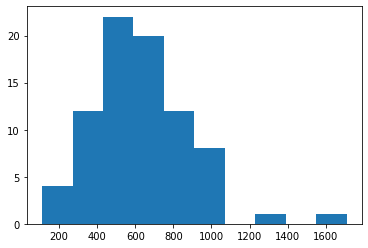

In [22]:
filename = "D:/MS_TUD/MMSR/TrainingData/data_extracted/videos/audio1.wav"

x, sr = librosa.load(filename, sr=16000)
int(librosa.get_duration(x, sr) / 60)

# Create chunks for 50 secs
max_slice = 50
window_length = max_slice * sr
a = x[21 * window_length:22 * window_length]
ipd.Audio(a, rate=sr)

# Calculate the energy
energy = sum(abs(a ** 2))
print(energy)

# Calculate the energy for each chunk
energy = np.array([sum(abs(x[i:i + window_length] ** 2)) for i in range(0, len(x), window_length)])

# Plot the above thing
plt.hist(energy)
plt.show()

###### Classify every chunk as excitement or not (based on a threshold value)

In [23]:
# Create a df for energy data
df = pd.DataFrame(columns=['energy', 'start', 'end'])
thresh = 800
row_index = 0
for i in range(len(energy)):
    value = energy[i]
    if value >= thresh:
        i = np.where(energy == value)[0]
        df.loc[row_index, 'energy'] = value
        df.loc[row_index, 'start'] = i[0] * 50
        df.loc[row_index, 'end'] = (i[0] + 1) * 50
        row_index = row_index + 1

# create the excitement snippet
temp = []
i = 0
j = 0
n = len(df) - 2
m = len(df) - 1
while (i <= n):
    j = i + 1
    while (j <= m):
        if (df['end'][i] == df['start'][j]):
            df.loc[i, 'end'] = df.loc[j, 'end']
            temp.append(j)
            j = j + 1
        else:
            i = j
            break
df.drop(temp, axis=0, inplace=True)
print(df)


     energy start   end
0    834.26    50   150
2    842.71   550   700
5   826.799  1050  1100
6   1039.12  1400  1500
8   945.059  1800  1850
9   894.692  2050  2100
10  1026.27  2250  2350
12  950.539  2550  2600
13  925.981  2950  3050
15  1059.71  3200  3300
17  1358.07  3900  3950


###### Merge all the excitement-clips to form the video highlights

In [24]:
start = np.array(df['start'])
end = np.array(df['end'])
for i in range(len(df)):
    if i != 0:
        start_lim = start[i] - 50
    else:
        start_lim = start[i]
    end_lim = end[i]
    filename = "training_highlight" + str(i + 1) + ".mp4"
    ffmpeg_extract_subclip("D:/MS_TUD/MMSR/TrainingData/data_extracted/videos/training1.mp4", start_lim, end_lim, targetname=filename)

Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful


In [25]:
clip1 = VideoFileClip("C:/Users/shipr/training_highlight1.mp4")
clip2 = VideoFileClip("C:/Users/shipr/training_highlight2.mp4")
clip3 = VideoFileClip("C:/Users/shipr/training_highlight3.mp4")
clip4 = VideoFileClip("C:/Users/shipr/training_highlight4.mp4")
clip5 = VideoFileClip("C:/Users/shipr/training_highlight5.mp4")
clip6 = VideoFileClip("C:/Users/shipr/training_highlight6.mp4")
clip7 = VideoFileClip("C:/Users/shipr/training_highlight7.mp4")
clip8 = VideoFileClip("C:/Users/shipr/training_highlight8.mp4")
clip9 = VideoFileClip("C:/Users/shipr/training_highlight9.mp4")
clip10 = VideoFileClip("C:/Users/shipr/training_highlight10.mp4")
clip11 = VideoFileClip("C:/Users/shipr/training_highlight11.mp4")

final_clip = concatenate_videoclips([clip1,clip2,clip3,clip4,clip5,clip6,clip7,clip8,clip9,clip10,clip11])

final_clip.write_videofile("D:/MS_TUD/MMSR/TrainingData/data_extracted/videos/training1_finalHighlight.mp4")


Moviepy - Building video D:/MS_TUD/MMSR/TrainingData/data_extracted/videos/training1_finalHighlight.mp4.
MoviePy - Writing audio in training1_finalHighlightTEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video D:/MS_TUD/MMSR/TrainingData/data_extracted/videos/training1_finalHighlight.mp4



Moviepy - Done !
Moviepy - video ready D:/MS_TUD/MMSR/TrainingData/data_extracted/videos/training1_finalHighlight.mp4
